# Lariosa, Gerald Darwin D.

*February 10, 2025*

## Import Libraries

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Scrape Website Data

In [2]:
url = "https://www.python.org/"
response = urllib.request.urlopen(url)
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()

In [3]:
print(text)





 




































Welcome to Python.org





















Notice: While JavaScript is not essential for this website, your interaction with the content will be limited. Please turn JavaScript on for the full experience. 






Skip to content


▼ Close
                


Python


PSF


Docs


PyPI


Jobs


Community



▲ The Python Network
                









Donate

≡ Menu


Search This Site


                                    GO
                                





A A

Smaller
Larger
Reset






Socialize

LinkedIn
Mastodon
Chat on IRC
Twitter










About

Applications
Quotes
Getting Started
Help
Python Brochure



Downloads

All releases
Source code
Windows
macOS
Other Platforms
License
Alternative Implementations



Documentation

Docs
Audio/Visual Talks
Beginner's Guide
Developer's Guide
FAQ
Non-English Docs
PEP Index
Python Books
Python Essays



Community

Diversity
Mailing Lists
IRC
Forums
PSF Annual Impact Report
Python Conferences
Spec

##  Load Stopwords

In [4]:

with open("stop_words.txt", "r") as f:
    stop_words = set(f.read().split())


## Tokenize and Count Stopwords

In [5]:

tokens = [token for token in text.split()]
stopword_count = [word for word in tokens if word.lower() in stop_words]

print(f"Total Stopwords Found: {len(stopword_count)}")
print("Stopwords List:", stopword_count)


Total Stopwords Found: 205
Stopwords List: ['to', 'While', 'is', 'not', 'for', 'this', 'your', 'with', 'the', 'be', 'on', 'for', 'the', 'to', 'The', 'This', 'A', 'A', 'on', 'About', 'All', 'Other', 'of', 'Get', 'from', 'the', 'an', 'up', 'to', 'while', 'a', 'The', 'of', 'is', 'and', 'and', 'More', 'about', 'in', 'for', 'in', 'and', 'the', 'as', 'in', 'other', 'are', 'of', 'the', 'that', 'can', 'be', 'and', 'with', 'other', 'More', 'about', 'in', 'a', 'are', 'with', 'and', 'is', 'the', 'and', 'as', 'can', 'be', 'for', 'More', 'about', 'in', 'For', 'on', 'a', 'for', 'in', 'The', 'All', 'the', 'the', 'that', 'other', 'while', 'and', 'with', 'some', 'of', 'its', 'own', 'of', 'More', 'in', "I'm", "I'm", 'is', 'your', 'What', 'is', 'your', 'to', 'in', 'any', 'other', 'can', 'up', 'very', 'and', 'the', 'and', 'to', 'your', 'with', 'our', 'is', 'a', 'that', 'you', 'and', 'more', 'More', 'Get', "you're", 'to', 'or', 'an', "it's", 'to', 'and', 'with', 'our', 'and', 'are', 'for', 'for', 'all', 'f

In [6]:
freq_dis_nltk = nltk.FreqDist(tokens)
freq_dis_nltk

FreqDist({'Python': 49, '>>>': 23, 'and': 20, 'to': 16, 'the': 15, 'News': 11, 'Events': 11, 'is': 10, 'for': 10, 'PSF': 10, ...})

## Clean Tokens and Generate Word Cloud

In [7]:

clean_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
freq_dis_nltk = nltk.FreqDist(clean_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dis_nltk)


## Visualize Frequency Distribution

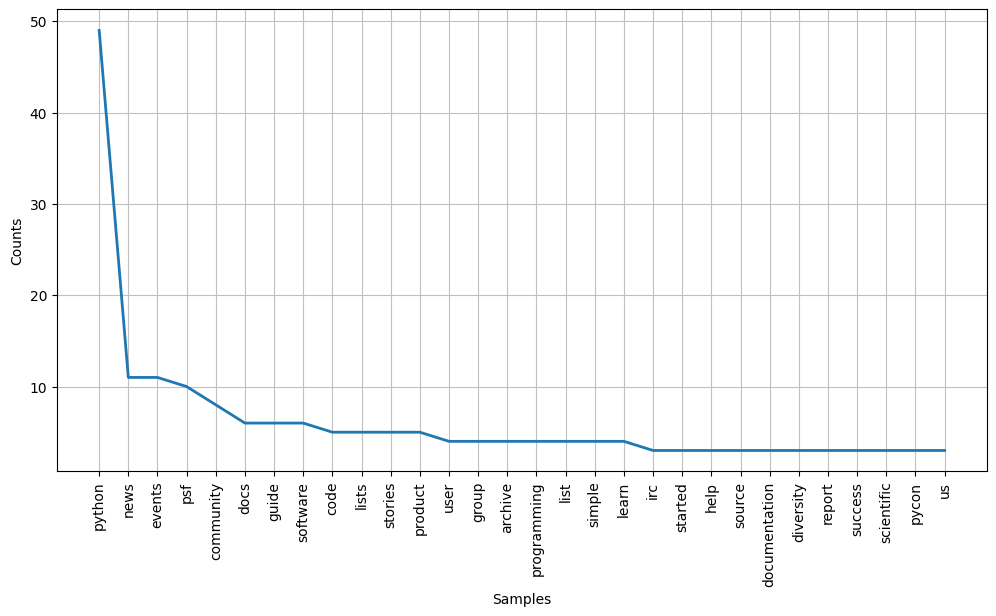

In [8]:

plt.figure(figsize=(12, 6))
freq_dis_nltk.plot(30, cumulative=False)
plt.show()


##  Display Word Cloud

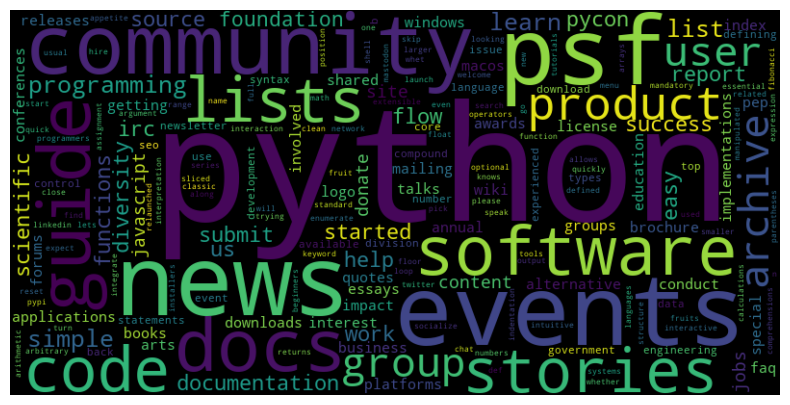

In [9]:
# Step 6: Display Word Cloud with Enhanced Aesthetics
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black',  
    colormap='viridis',  
    contour_color='white', 
    contour_width=2
).generate_from_frequencies(freq_dis_nltk)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()